In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.corpus import stopwords

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/josealonsoordinolaaucca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
#DATA - Archivo con los comentarios extraidos de TikTok

data = pd.read_excel('base_rental_tiktok_.xlsx')
data['comment'] = [str(comment) for comment in data['comment']]

In [20]:
#LIMPIEZA - proceso de limpieza usando NLP

#Eliminamos los URL: Todo lo que empieza por  HTTP
data['Clean_Text']=data['comment'].replace(r"http\S+", '', regex=True)
#Eliminamos todos los hashtags
data['Clean_Text']=data['Clean_Text'].replace('#\\w+', '', regex=True)
#Eliminamos los signos de puntuación repetidos dentro de los tweets
data['Clean_Text']=data['Clean_Text'].replace(r'([^0-9a-zA-Z])\1+', r'\1', regex=True)
#Eliminamos los signos de puntuación al inicio de un tweet
data['Clean_Text']=data['Clean_Text'].replace(r'^[^0-9a-zA-Z@#]+', '', regex=True)
#Eliminamos los dobles espacios
data['Clean_Text']=data['Clean_Text'].replace(r'()\1+', r'\1\1', regex=True)
#Eliminamos las letras repetivas dentro de las palabras
data['Clean_Text']=data['Clean_Text'].replace(r'(.)\1+', r'\1\1', regex=True)
# Quitar las comillas de los textos
data['Clean_Text']=data['Clean_Text'].replace('"', '', regex=True)
# Remover puntuaciones innecesarias
data['Clean_Text'] = data['Clean_Text'].map(lambda x: re.sub('[,\.!?]', '', x))
data['Clean_Text']= data['Clean_Text'].str.replace('RT', '')
# Remover mayúsculas de inicio de texto
data['Clean_Text'] = data['Clean_Text'].map(lambda x: x.lower())
#Autores
data['Clean_Text']=data['Clean_Text'].replace(r'@\w+', '', regex=True)
data['Clean_Text']=data['Clean_Text'].str.replace('rt', '')
#Espacios
data['Clean_Text']=data['Clean_Text'].str.strip()
data['Clean_Text']=data['Clean_Text'].replace('Document_No', '')
data['Clean_Text']=data['Clean_Text'].replace('pasapoe', 'pasaporte')
# Exclude stopwords 
spanish_stopwords=stopwords.words('spanish')
spanish_stopwords.extend(['ser', 'haber','ver','no','ni','ago',
                          'buenas','cómo','tal','hola','cn',
                          'si', 'bien', 
                          'aun', 'asi',
                          'jajaja','mil',
                          'pesos','200',
                          'así','da','vivo',
                          'aqui','quieren'])
#spanish_stopwords.extend(usuarios)
#spanish_stopwords.remove('no')
#spanish_stopwords.remove('ni')
data['Clean_Text_no_stopwords'] = data['Clean_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (spanish_stopwords) and len(word)>1]))
data.fillna('',inplace=True)
data.head(2)

,Unnamed: 0,level,display_name,username,comment,fecha,likes,replies,Thread_author,Clean_Text,Clean_Text_no_stopwords
0,0,1,Nathaly Gonzalez69,https://www.tiktok.com/@25nathy98,soy rola y estoy en las mismas... me piden una...,5-17,5090.0,69,https://www.tiktok.com/@25nathy98,soy rola y estoy en las mismas me piden una ge...,rola mismas piden gema infinito tanos fiador
1,1,2,mariannycorderoo · Creador,https://www.tiktok.com/@mariannycorderoo,JAJAJAJAJA ameeeee usaré esa frase para otro v...,5-17,743.0,0,https://www.tiktok.com/@25nathy98,jajajajaja amee usaré esa frase para otro video 😂,jajajajaja amee usaré frase video


In [21]:
#LIMPIEZA PREPARATORIA

comentarios = data['Clean_Text_no_stopwords']
comentarios = comentarios.replace('Document_No', '')
comentarios = comentarios.replace('dtype', '')
comentarios = comentarios.replace('object', '')
comentarios = comentarios.replace('Name', '')
comentarios = comentarios.replace('Length', '')
comentarios = comentarios.replace('Clean_Text_no_stopwords', '')
comentarios = comentarios.replace('pasapoe', 'pasaporte')

texto = ''.join(comentarios)


LLUVIA DE PALABRAS

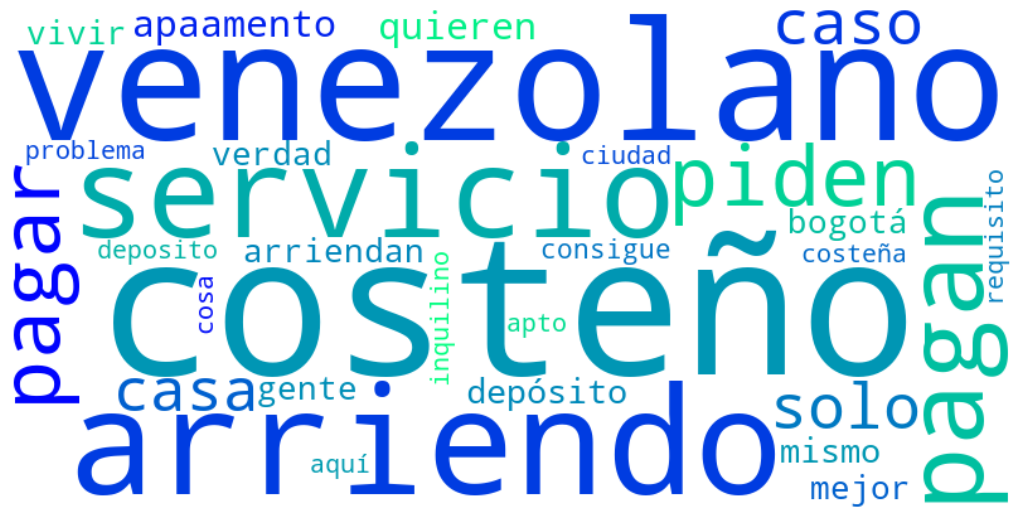

In [22]:
wordcloud = WordCloud(
    max_words=30,width=800, height=400, background_color='white',colormap='winter_r').generate(texto)

plt.figure(figsize=(13, 18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desactivar los ejes
plt.show()


HISTOGRAMA

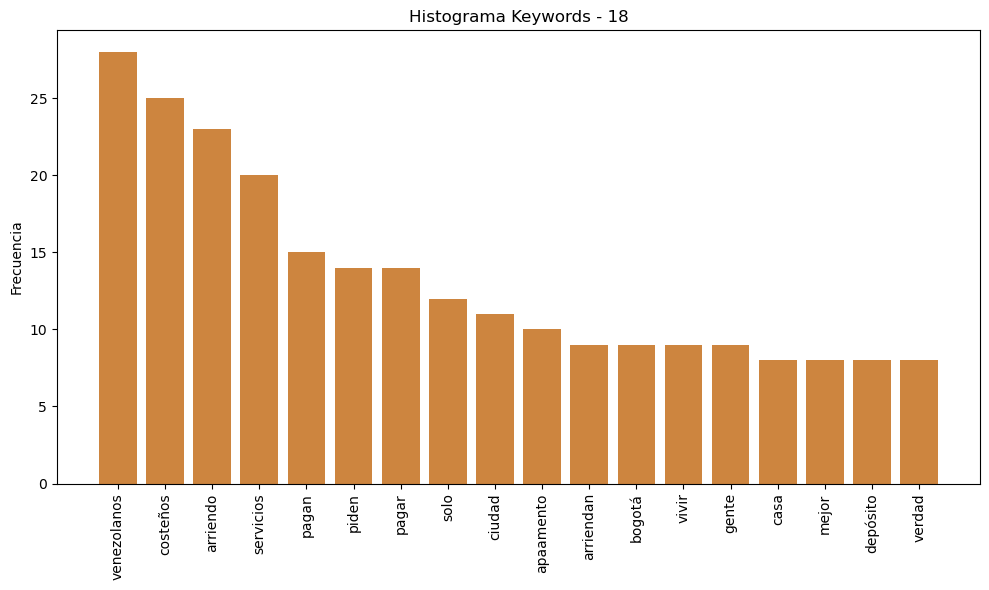

In [41]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

# Calcular frecuencias de palabras
word_counts = Counter(texto.split())

# Filtrar palabras no deseadas (opcional, puedes ajustar según tu necesidad)
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in STOPWORDS and word.lower() not in ['si', 'bien', 
                                                                                                                             'aun', 'asi',
                                                                                                                             'jajaja','mil',
                                                                                                                             'pesos','200',
                                                                                                                             'así','da','vivo',
                                                                                                                             'quieren','mas','aquí','mismo','caso',
                                                                                                                             'buscando']}

# Seleccionar las 35 palabras más frecuentes
top_words = dict(sorted(filtered_word_counts.items(), key=lambda item: item[1], reverse=True)[:18])

# Crear listas de palabras y frecuencias para el histograma
words = list(top_words.keys())
frequencies = list(top_words.values())

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies,color='peru')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')
plt.title('Histograma Keywords - 18')
plt.tight_layout()

# Mostrar el histograma
plt.show()
